In [2]:
import xarray as xr
import dask
import numpy as np
import scipy
import os
from HeatBudget_cesm2 import *
from pathlib import Path
import traceback

In [3]:
file = '/home/z5113258/thetao_Omon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc'

In [49]:
T = xr.open_mfdataset(file, parallel=True).thetao
#convert level to m if not already
if T.lev.attrs['units'] =='m':
    pass
elif T.lev.attrs['units'] =='cm':
    T['lev'] = T['lev']/100
    T.lev.attrs['units'] = 'm'
elif T.lev.attrs['units'] =='centimeters':
    T['lev'] = T['lev']/100
    T.lev.attrs['units'] = 'm'
#subset spatially
T = T.sel(lat=slice(-40,30),lon=slice(30,125))
#subset time
T = T.sel(time= slice('1950', '2015'))
#interpolate to 50m
T = insert_level(T)

In [50]:
T

<xarray.DataArray 'thetao' (time: 780, lev: 5, lat: 60, lon: 95)>
dask.array<getitem, shape=(780, 5, 60, 95), dtype=float32, chunksize=(780, 5, 60, 95), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0
Attributes: (12/19)
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Diagnostic should be contributed even for models using co...
    ...             ...
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Potential Temperature
    type:           real
    variable_id:    thetao

In [43]:
da = ds.thetao

In [44]:
T=da

In [45]:
if T.lev.attrs['units'] =='m':
    pass
elif T.lev.attrs['units'] =='cm':
    T['lev'] = T['lev']/100
    T.lev.attrs['units'] = 'm'
    print('here')
elif T.lev.attrs['units'] =='centimeters':
    T['lev'] = T['lev']/100
    T.lev.attrs['units'] = 'm'
    print('here')

here


In [48]:
T2 = insert_level(T)

In [37]:
T2

<xarray.DataArray 'thetao' (time: 1980, lev: 5, lat: 60, lon: 360)>
dask.array<getitem, shape=(1980, 5, 60, 360), dtype=float32, chunksize=(1980, 5, 60, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:00:00
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0
Attributes: (12/19)
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Diagnostic should be contributed even for models using co...
    ...             ...
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Potential Temperature
    type:           real
    variable_id:    thetao

In [53]:
def get_temp_tendency(model):
    #load in T
    T = xr.open_mfdataset(model, parallel=True).thetao
    #convert level to m if not already
    if T.lev.attrs['units'] =='m':
        pass
    elif T.lev.attrs['units'] =='cm':
        T['lev'] = T['lev']/100
        T.lev.attrs['units'] = 'm'
    elif T.lev.attrs['units'] =='centimeters':
        T['lev'] = T['lev']/100
        T.lev.attrs['units'] = 'm'
    #subset spatially
    T = T.sel(lat=slice(-40,30),lon=slice(30,125))
    #subset time
    T = T.sel(time= slice('1950', '2015'))
    #interpolate to 50m
    T = insert_level(T)
    #get time deriviative
    dTdt = diff_T(T)
    #weighted average
    dTdt_w = weighted_avg(dTdt)
    #get climatology
    dTdt_clim = get_clim(dTdt_w)
    return dTdt_clim

In [5]:
dt = get_temp_tendency(file)

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


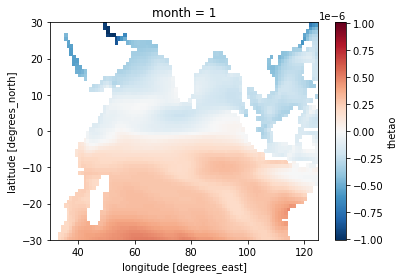

In [7]:
dt[0].plot()